Evin Büyüklüğü bahçe dahil         :  500
Yatak odası sayısı                 :  3
Banyo sayısı                       :  3
Kat sayısı                         :  3
Otopark sayısı                     :  1
Anayol bağlantısı var mı [E=1/H=0] :  1
Misafir odası var mı     [E=1/H=0] :  1
Bodrumu var mı           [E=1/H=0] :  0
Sıcak su var mı          [E=1/H=0] :  1
Klima var mı             [E=1/H=0] :  0
Tam mobilyalı mı         [E=1/H=0] :  0
Yarım mobilyalı mı       [E=1/H=0] :  1
[500, 3, 3, 3, 1, 1, 1, 0, 1, 0, 0, 1]
---------------------------------------
Tahmini ev fiyatı :  6212097 ...
---------------------------------------


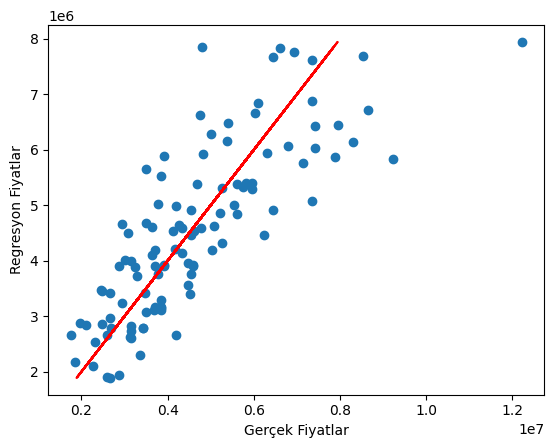

In [ ]:
from re import X
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
data_file_path="/content/drive/MyDrive/Tr_ev_fiyatlari_v2.csv"
df = pd.read_csv(data_file_path)
object_columns=df.select_dtypes(include=['object']).columns
df=pd.get_dummies(df, columns=object_columns)
df.drop(['anayol_baglanti_hayır','misafir_odası_hayır','bodrum_hayır','sıcak_su_hayır','klima_hayır','mob_drm_mobilyasız'],
axis=1,inplace=True)
y=df["fiyat"]
df.drop('fiyat',axis=1,inplace=True)
X=df
X_train ,X_test ,y_train ,y_test=train_test_split(X,y,test_size=0.2,random_state=7)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
plt.scatter(y_test,y_pred)
plt.plot(y_pred,y_pred,color='red')
plt.xlabel("Gerçek Fiyatlar")
plt.ylabel("Regresyon Fiyatlar")


ozellik=[]
ozellik.append(int(input("Evin Büyüklüğü bahçe dahil         :  ")))
ozellik.append(int(input("Yatak odası sayısı                 :  ")))
ozellik.append(int(input("Banyo sayısı                       :  ")))
ozellik.append(int(input("Kat sayısı                         :  ")))
ozellik.append(int(input("Otopark sayısı                     :  ")))
ozellik.append(int(input("Anayol bağlantısı var mı [E=1/H=0] :  ")))
ozellik.append(int(input("Misafir odası var mı     [E=1/H=0] :  ")))
ozellik.append(int(input("Bodrumu var mı           [E=1/H=0] :  ")))
ozellik.append(int(input("Sıcak su var mı          [E=1/H=0] :  ")))
ozellik.append(int(input("Klima var mı             [E=1/H=0] :  ")))
ozellik.append(int(input("Tam mobilyalı mı         [E=1/H=0] :  ")))
ozellik.append(int(input("Yarım mobilyalı mı       [E=1/H=0] :  ")))
print(ozellik)
tahmini_fiyat=model.predict([ozellik])
print("---------------------------------------")
print("Tahmini ev fiyatı : ",int(tahmini_fiyat),"...")
print("---------------------------------------")


# New Section